## STA130 HW07
___

## 1.)

a. Simple Linear Regression VS Multiple Linear Regression
- Simple Linear Regression nvolves one independent (predictor) variable, where the relationship between the predictor $x$ and the response $Y$ is modeled as:
> $Y$ = β<sub>0</sub> + β<sub>1</sub>$x$ + ϵ
- Multiple Linear Regression includes two or more independent variables, aiming to capture a more nuanced relationship with the response variable $Y$ with multiple predictors:
> $Y$ = β<sub>0</sub> + β<sub>1</sub>$x$<sub>1</sub> + β<sub>2</sub>$x$<sub>2</sub> + ... + β<sub>n</sub>$x$<sub>n</sub> + ϵ
- Multiple Linear Regression would be more beneficial since it captures the interplay between different variables, potentially reducing the error in the model and improving predictive accuracy when multiple factors influence the outcome.

b. Continuous Variable VS Indicator Variable 
- **Continuous Variable**: A continuous predictor in linear regression is quantitative and has a direct, often proportional, impact on the response variable $Y$.
- **Indicator Variable**: An indicator variable is qualitative, taking only values of 0 or 1 to indicate the presence or absence of a specific condition or category
- These two forms in simple linear regression yield different effects on the response. A continuous variable modifies $Y$ by scaling (a change in the slope), whereas an indicator variable shifts $Y$ based on whether a certain condition applies (a change in the intercept only).

c. When a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression
- When a single indicator variable is introduced alongside a continuous variable, the multiple linear regression model can represent differences in intercepts for different groups while retaining the effect of the continuous predictor. The model would look like:
> $Y$ = β<sub>0</sub> + β<sub>1</sub>$x$<sub>continuous</sub> + β<sub>2</sub>$x$<sub>indicator</sub> + ϵ
- This model now accounts for group-based distinctions in $Y$ by adjusting the intercept based on the indicator variable, while the continuous variable modifies the slope. As a result, the model captures how the continuous predictor’s influence on the response differs between groups. This provides more accuracy than a simple linear regression, as it reflects both a continuous trend and a categorical distinction in $Y$.

d. The effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models
- Adding an interaction term between a continuous and an indicator variable introduces the possibility that the slope for the continuous variable changes depending on the group indicated by the binary variable. The model would take the form:
> $Y$ = β<sub>0</sub> + β<sub>1</sub>$x$<sub>continuous</sub> + β<sub>2</sub>$x$<sub>indicator</sub> + + β<sub>3</sub>($x$<sub>continuous</sub>$x$<sub>indicator</sub>) + ϵ
- The interaction term β<sub>3</sub> modifies the relationship between the continuous variable and $Y$ based on the indicator group. This makes the model’s slope for $x$<sub>continuous</sub> vary across categories defined by the indicator variable, allowing for different patterns in the data for each group. The linear form thus becomes dynamic and adaptable, modeling complex relationships where continuous predictors affect each group differently.

e. The behavior of a Multiple Linear Regression model based only on indicator variables derived from a non-binary categorical variable
- When a multiple linear regression model is based entirely on indicator variables derived from a non-binary categorical variable, it effectively models differences across multiple categories without assuming a direct continuous effect. The model form would be:
> $Y$ = β<sub>0</sub> + β<sub>1</sub>$x$<sub>continuous</sub> + β<sub>2</sub>$x$<sub>indicator</sub> + + β<sub>3</sub>$x$<sub>3</sub> + ϵ
- In this case, each level of the categorical variable is encoded as a separate binary indicator variable. The model’s form allows each category to have a unique intercept, capturing differences across discrete groups without a continuous trend, and creating predictions specific to each category.
___


## 2.)
**Outcome Variable ($Y$).** Sports Equipment Sales

**Predictor Variable ($x$).** TV Ads and Online Ads

1.

**Without Interaction**

A model without interaction assumes that the effect of TV advertising on sales is independent of online advertising (and vice versa). The linear equation will be:

> Sales = β<sub>0</sub> + β<sub>1</sub>(TV Ads) + β<sub>2</sub>(Online Ads) + ϵ

Where:

β<sub>0</sub> - intercept

β<sub>1</sub> - impact of TV ads on sales

β<sub>2</sub> - impact of online ads on sales

ϵ - error term

The predictions we get from this model assume that increasing the TV or online advertising ads has a fixed effect on sales, regardless of the ad. We can observe a straightforward additive relationship.

**With Interaction**

A model with interaction accounts for the possibility that the effect of TV advertising depends on the online advertising budget (and vice versa). The linear equation is:

> Sales = β<sub>0</sub> + β<sub>1</sub>(TV Ads) + β<sub>2</sub>(Online Ads) + β<sub>3</sub>((TV Ads)(Online Ads)) + ϵ

Where the added β<sub>3</sub> represents the interaction effect. ((TV Ads)(Online Ads)) indicates the impact of one advertising medium is modified by the other.

This model suggests that the impact of the TV ads on sales varies based on the online ads. This allows for more nuanced predictions, particularly if certain combinations of ads yield different sales outcomes than would be expected by simply adding the two effects.

2. 

If the ads for TV and online are categorized as “high” or “low” (binary variables), we adjust the model to reflect this categorical distinction. Let’s denote these binary variables as follows:

- **TV Ads**. 1 if high, 0 if low.
- **Online Ads**. 1 if high, 0 if low.

**Without Interaction**

> Sales = β<sub>0</sub> + β<sub>1</sub>(TV Ads (high/low)) + β<sub>2</sub>(Online Ads (high/low)) + ϵ

Where:

β<sub>1</sub> - represents the difference in sales when the TV ads is high versus low, holding the online ads constant.

β<sub>2</sub> - represents the difference in sales when the online ads is high versus low, holding the TV ads constant.

Sales predictions depend solely on whether the TV and online ads are high or low, without considering any combined effect.

**With Interaction**

> Sales = β<sub>0</sub> + β<sub>1</sub>(TV Ads (high/low)) + β<sub>2</sub>(Online Ads (high/low)) + β<sub>3</sub>((TV Ads (high/low))(Online Ads (high/low))) + ϵ

Where:

β<sub>3</sub> - is the newly added term which represents the interaction between high/low TV and online ads. The interaction term will indicate whether having both ads set to high (or low) has a different effect than the additive effects alone.

This model predicts sales by also accounting for the possibility that certain combinations of high and low ads yield better or worse outcomes.

___



## 3.)




In [119]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

import numpy as np

import pandas as pd

cols = pd.read_csv("var_names.csv")
data = pd.read_csv("CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] 

dataV2 = data[data.REMOVE_case=='No'].copy()

dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()

dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()

missingness_limit = 100
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
dataV2_cohortV3.shape

pd.set_option('display.max_columns', dataV2_cohortV3.shape[1])



/tmp/ipykernel_53/1288749377.py:10: DtypeWarning:

Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.



Optimization terminated successfully.
         Current function value: 0.576463
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.576383
         Iterations 6


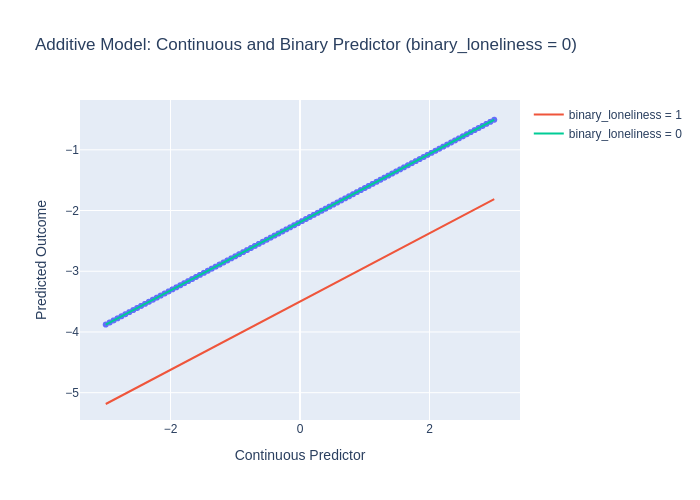

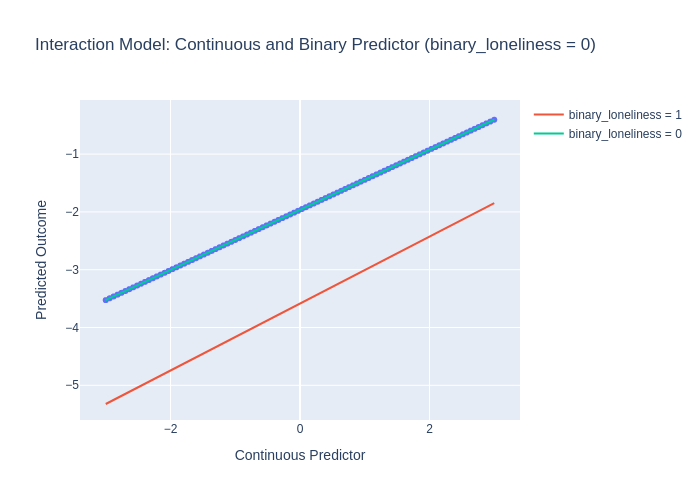

                           Logit Regression Results                           
Dep. Variable:         binary_outcome   No. Observations:                  804
Model:                          Logit   Df Residuals:                      801
Method:                           MLE   Df Model:                            2
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                  0.1547
Time:                        21:55:14   Log-Likelihood:                -463.48
converged:                       True   LL-Null:                       -548.30
Covariance Type:            nonrobust   LLR p-value:                 1.449e-37
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             -2.1914      0.429     -5.10

In [122]:
import plotly.express as px
import plotly.graph_objects as go

# Simulate the binary outcome and predictor data for demonstration
# (Assume `dataV2_cohortV3` is your dataset with the necessary columns)

dataV2_cohortV3['binary_outcome'] = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_score'].apply(lambda x: 1 if x >= 5 else 0)
dataV2_cohortV3['binary_loneliness'] = dataV2_cohortV3['LONELY_ucla_loneliness_scale_score'].apply(lambda x: 1 if x >= 5 else 0)

# Fit the Additive Model (ignore the log-odds interpretation for simplicity)
model_additive = smf.logit('binary_outcome ~ PSYCH_zimet_multidimensional_social_support_friends_subscale_score + binary_loneliness', data=dataV2_cohortV3).fit()

# Fit the Interaction Model
model_interaction = smf.logit('binary_outcome ~ PSYCH_zimet_multidimensional_social_support_friends_subscale_score * binary_loneliness', data=dataV2_cohortV3).fit()

# Simulate random data for visualization
np.random.seed(0)
n = 100
continuous_data = np.linspace(-3, 3, n)  # Continuous predictor range

# Predict for binary_loneliness = 0 and binary_loneliness = 1 separately

# Additive Model Predictions for binary_loneliness = 0 and 1
additive_pred_0 = model_additive.params['Intercept'] + model_additive.params['PSYCH_zimet_multidimensional_social_support_friends_subscale_score'] * continuous_data + model_additive.params['binary_loneliness'] * 0
additive_pred_1 = model_additive.params['Intercept'] + model_additive.params['PSYCH_zimet_multidimensional_social_support_friends_subscale_score'] * continuous_data + model_additive.params['binary_loneliness'] * 1

# Interaction Model Predictions for binary_loneliness = 0 and 1
interaction_pred_0 = (model_interaction.params['Intercept'] + 
                      model_interaction.params['PSYCH_zimet_multidimensional_social_support_friends_subscale_score'] * continuous_data + 
                      model_interaction.params['binary_loneliness'] * 0 + 
                      model_interaction.params['PSYCH_zimet_multidimensional_social_support_friends_subscale_score:binary_loneliness'] * continuous_data * 0)

interaction_pred_1 = (model_interaction.params['Intercept'] + 
                      model_interaction.params['PSYCH_zimet_multidimensional_social_support_friends_subscale_score'] * continuous_data + 
                      model_interaction.params['binary_loneliness'] * 1 + 
                      model_interaction.params['PSYCH_zimet_multidimensional_social_support_friends_subscale_score:binary_loneliness'] * continuous_data * 1)

# Plot Additive Model: Continuous Predictor with Binary Loneliness
fig_additive = px.scatter(x=continuous_data, y=additive_pred_0, labels={'x': 'Continuous Predictor', 'y': 'Predicted Outcome'},
                          title='Additive Model: Continuous and Binary Predictor (binary_loneliness = 0)')
fig_additive.add_traces(go.Scatter(x=continuous_data, y=additive_pred_1, mode='lines', name='binary_loneliness = 1'))
fig_additive.add_traces(go.Scatter(x=continuous_data, y=additive_pred_0, mode='lines', name='binary_loneliness = 0'))

# Plot Interaction Model: Continuous Predictor with Binary Loneliness
fig_interaction = px.scatter(x=continuous_data, y=interaction_pred_0, labels={'x': 'Continuous Predictor', 'y': 'Predicted Outcome'},
                             title='Interaction Model: Continuous and Binary Predictor (binary_loneliness = 0)')
fig_interaction.add_traces(go.Scatter(x=continuous_data, y=interaction_pred_1, mode='lines', name='binary_loneliness = 1'))
fig_interaction.add_traces(go.Scatter(x=continuous_data, y=interaction_pred_0, mode='lines', name='binary_loneliness = 0'))

# Show both figures
fig_additive.show(renderer='png')
fig_interaction.show(renderer='png')

print(model_additive.summary())
print(model_interaction.summary())

1. **Linear Forms**; How to make **predictions**

<u>The additive model is:</u>
> `binary_outcome` = β<sub>0</sub> + β<sub>1</sub> ⋅`PSYCH_zimet_multidimensional_social_support_friends_subscale_score` + β<sub>2</sub>⋅`binary_loneliness`

Where:

`binary_outcome` is the dependent variable (a binary outcome).

`PSYCH_zimet_multidimensional_social_support_friends_subscale_score` is the continuous predictor variable (representing social support).

`binary_loneliness` is the binary predictor variable (1 for lonely, 0 for not lonely).

**Predictions**: To make predictions using this additive model, you would plug in the values of the continuous predictor (`PSYCH_zimet_multidimensional_social_support_friends_subscale_score`) and the binary indicator (`binary_loneliness`) into the equation. You would then compute the resulting prediction of `binary_outcome` using the coefficients (`β0`, `β1`, and `β2`).

<u>The interaction model is:</u>
> `binary_outcome` = β<sub>0</sub> + β<sub>1</sub> ⋅`PSYCH_zimet_multidimensional_social_support_friends_subscale_score` + β<sub>2</sub>⋅`binary_loneliness` + β<sub>3</sub>(`PSYCH_zimet_multidimensional_social_support_friends_subscale_score`×`binary_loneliness`)

Where:

`PSYCH_zimet_multidimensional_social_support_friends_subscale_score` * `binary_loneliness` is the interaction term.

**Predictions**: To make predictions with the interaction model, you will again plug in the values of the continuous predictor and the binary predictor into the equation. The key difference is that now the prediction will adjust depending on whether the person is lonely or not, due to the interaction term. For example, the effect of a one-unit increase in social support will vary depending on the value of binary_loneliness (whether the person is lonely or not).

2. Interpreting the Statistical Evidence Associated with the Predictor Variables

<u>Additive Model</u>
- `binary_loneliness` (-1.3085): The coefficient is negative (-1.3085), which indicates that loneliness decreases the likelihood of the positive outcome. The associated p-value of 0.000 shows that this effect is statistically significant.
- `PSYCH_zimet_multidimensional_social_support_friends_subscale_score` (0.5622): The coefficient is positive (0.5622), which suggests that as social support increases, the likelihood of a positive outcome increases. The associated p-value of 0.000 indicates that this effect is highly statistically significant.

<u>Interaction Model</u>
- `PSYCH_zimet_multidimensional_social_support_friends_subscale_score` (0.5202): The coefficient of social support in the interaction model is positive (0.5202), which again suggests that an increase in social support increases the likelihood of the positive outcome. The p-value of 0.000 indicates that this effect is statistically significant.
- `binary_loneliness` (-1.6198): The coefficient is negative (-1.6198), indicating that loneliness decreases the likelihood of the positive outcome. The p-value is 0.066, which is marginally significant at the 0.05 level, but not strictly significant.
- `binary_loneliness` x `PSYCH_zimet_multidimensional_social_support_friends_subscale_score` (0.0592): Its coefficient is positive (0.0592); however, the p-value is 0.718, which is not statistically significant. The lack of statistical significance in the interaction term suggests that the effect of social support on the outcome is not significantly different for lonely versus non-lonely individuals. In other words, there is no significant evidence that loneliness moderates (i.e., changes the strength or direction of) the relationship between social support and the outcome.


___
## 4.)

R-squared is defined as the measure of how much of the total variability in the dependent variable can be explained by the model while the large coefficients with statistical significance refers to whether the estimated coefficients are significantly different from zero. Even though only a proportion of variance is explained by the model, the individual predictors might still have strong, detectable effects on the outcome. This suggests that the variables have a real effect on the outcome, but there are many other factors just not captured in the model.

___
## 5.)

This sequence of code cells is setting up a series of steps to illustrate various aspects of model building, training, and testing, particularly highlighting the differences in explanatory power and predictive accuracy in both simple and complex models.

1. Data is being prepared by replacing missing values in the `Type 2` column with the string `'None'`. A Train-Test Split is also being conducted where the data is split into training and testing sets with a 50/50 ratio which prepares two sets of data: one to train the models and another to evaluate their out-of-sample predictive performance. The purpose is to see if a model generalizes well to new data or if it may be overfitting.



2. A simple linear regression model is fit to the training data, using `Attack` and `Defense` as predictors for `HP`. The summary output will show:
- R-squared and other model fit statistics.
- Coefficient values and significance for `Attack` and `Defense`, indicating whether these variables are statistically significant predictors of `HP`. 
This cell illustrates the behavior of a simpler model with limited predictors, which is expected to have lower explanatory power and potentially lower predictive accuracy on unseen data.



3. In this cell, the simple model's performance is being evaluated:
- In-sample R-squared: The R-squared value for the training data shows how much of the training data variability in `HP` the model can explain.
- Out-of-sample R-squared: Using the test data, the code calculates the R-squared for predictions vs. actual values in the test set, which indicates how well the model generalizes to new data.
If the out-of-sample R-squared is substantially lower than the in-sample R-squared, it may suggest that the model is not generalizing well, possibly due to underfitting (since only two predictors are used).



4. In this cell:
-  A complex linear model is created with multiple predictors, including high-order interactions `(Attack * Defense * Speed * Legendary * Sp. Def * Sp. Atk)`, allowing the model to capture possible synergistic effects among these features.
- Model Fit Summary: The summary will include fit statistics (like R-squared) and individual coefficient estimates for this large model.
This model will likely show a much higher in-sample R-squared than the simpler model, suggesting it captures more complexity in the data. However, the model risks overfitting due to the high number of predictors and interactions, which could lead to poor generalization to test data.



5. In this cell, the complex model performance is being evaluated:
- In-sample R-squared is printed to show the explanatory power within the training data, which is expected to be high for this complex model.
- Out-of-sample R-squared is calculated on the test data to evaluate the model’s generalization.
If the out-of-sample R-squared is significantly lower than the in-sample R-squared, this indicates that the model is overfitting, capturing noise and complexity specific to the training set rather than generalizable patterns.


___
## 6.)

The complex specification of `model4_linear_form` generates a large design matrix with many collinear predictors due to the interactions among original variables. This multicollinearity leads to unstable coefficient estimates, causing the model to overfit the training data. Consequently, the model’s predictions do not generalize well to new data, resulting in poor out-of-sample performance.

___
## 7.)
This progression develops models by gradually introducing complexity informed by insights from prior models. The goal is to capture essential predictors and interactions while avoiding overfitting. `Model`s `5` through `7` illustrate a careful expansion: beginning with the addition of new predictors, followed by refining those predictors based on significance, exploring interactions, and ultimately enhancing model stability through centering and scaling. This approach leads to more reliable predictions.


___
## 8.)

We can write a for loop that will iteratively split the data into training and testing sets, fit a model, and then collect the "in sample" and "out of sample" R-squared values for each iteration. By not setting the random seed within each loop, we will get a different training-test split each time. This will help us understand how the model's performance varies depending on the specific data split, which illustrates model stability and generalization variability across different samples.

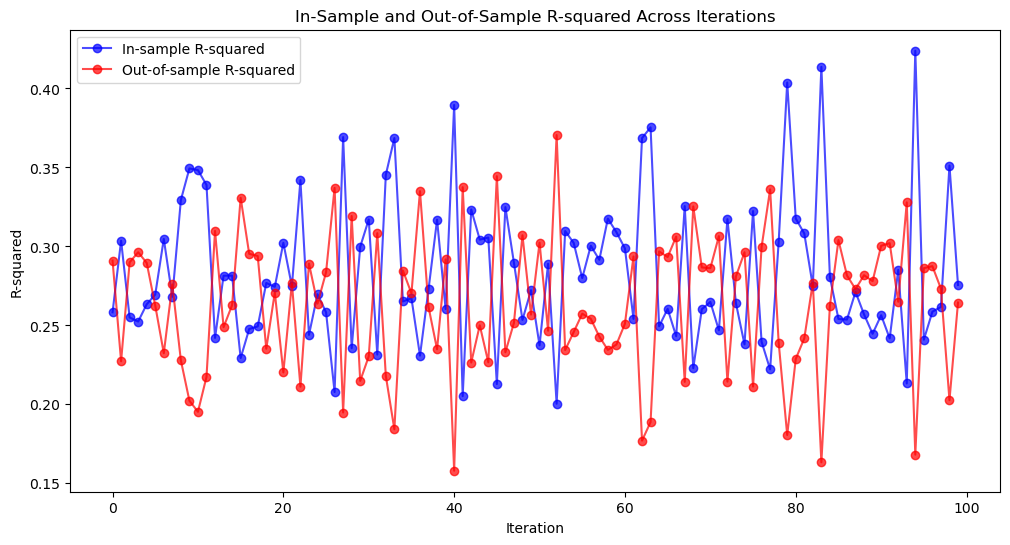

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import pandas as pd

# Load the dataset if not already loaded
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)

# Replace "NaN" values in "Type 2" with "None"
pokeaman.fillna('None', inplace=True)

# Define the model formula
model_formula = 'HP ~ Attack + Defense + Speed + Legendary + Q("Sp. Def") + Q("Sp. Atk")'

# Initialize lists to store in-sample and out-of-sample R-squared values
in_sample_r2 = []
out_of_sample_r2 = []

# Number of iterations
n_iterations = 100

# Loop to repeatedly train the model with different train-test splits
for _ in range(n_iterations):
    try:
        # Split data into training and testing sets
        pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
        
        # Fit the model on the training set
        model_spec = smf.ols(formula=model_formula, data=pokeaman_train)
        model_fit = model_spec.fit()
        
        # Calculate in-sample R-squared
        in_sample_r2.append(model_fit.rsquared)
        
        # Predict on the test set and calculate out-of-sample R-squared
        yhat = model_fit.predict(pokeaman_test)
        y_true = pokeaman_test.HP
        
        # Ensure yhat and y_true have valid values for correlation calculation
        if len(yhat) > 1 and len(y_true) > 1:
            out_sample_r2 = np.corrcoef(y_true, yhat)[0, 1] ** 2
            out_of_sample_r2.append(out_sample_r2)
        else:
            out_of_sample_r2.append(np.nan)  # Append NaN if correlation cannot be calculated

    except Exception as e:
        print(f"An error occurred in iteration {_}: {e}")

# Remove any NaN values that might have occurred
in_sample_r2 = [x for x in in_sample_r2 if not np.isnan(x)]
out_of_sample_r2 = [x for x in out_of_sample_r2 if not np.isnan(x)]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(in_sample_r2, label='In-sample R-squared', marker='o', linestyle='-', color='blue', alpha=0.7)
plt.plot(out_of_sample_r2, label='Out-of-sample R-squared', marker='o', linestyle='-', color='red', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('R-squared')
plt.title('In-Sample and Out-of-Sample R-squared Across Iterations')
plt.legend()
plt.show()

- **In-Sample vs. Out-of-Sample Variability**: The in-sample R-squared should generally be higher, as it reflects the model's performance on the data it was trained on. The out-of-sample R-squared will typically be lower, showing how well the model generalizes to new data.
- **Model Stability**: If the out-of-sample R-squared varies greatly across iterations, the model’s predictive power is sensitive to different data splits, suggesting instability.
- **Purpose of Demonstration**: This experiment reveals the model’s generalization performance and stability by showing how it behaves with varying samples. It’s particularly useful for assessing models in environments where training data might differ over time, helping us understand the reliability and robustness of the model predictions.

___

## 9.)

This illustration uses models (model6 and model7) to evaluate how well predictions made from Pokémon data, trained on specific generations, apply to data from different generations. Here is a step-by-step breakdown of what each code does:
1. **Model Fitting on Generational Data**
- `model7_gen1_predict_future_fit`: Trained using only Generation 1 data, this model’s predictions are tested on other generations to assess generalization beyond its training subset.
- `model7_gen1to5_predict_future_fit`: Trained on Generations 1-5, this model’s performance is tested on Generation 6, representing entirely new data.
- The same process is repeated with model6, which includes fewer predictor variables, to see if simplicity improves or limits generalization.

2. **In-Sample vs. Out-of-Sample R-Squared Calculations**
- Original Models (`model6` and `model7`): Calculate R-squared on both training (in-sample) and testing (out-of-sample) data to establish a baseline for generalization.
- Generational Models: In-sample R-squared values reflect fit on training data (e.g., Generation 1), while out-of-sample R-squared values assess prediction accuracy on new, unseen generations

3. **Key Observations:**
- High In-Sample, Low Out-of-Sample R-squared: Indicates poor generalization, suggesting the model fits well to training data but struggles on other generations.
- Generational Impact on Predictions: Lower out-of-sample R-squared on new generations implies that Pokémon stats and predictor relationships vary across generations, hinting at evolving game balance.
- Model Stability Over Time: Testing models on different generations reveals their stability across changes in data, helping gauge robustness for future, evolving datasets.

___
## ChatGPT chat log:

### Model Fit vs Significance

https://chatgpt.com/share/6733ffbb-6aa4-8011-b5c9-dbf6a70c94e3

### Advertising Budget Interaction Models

https://chatgpt.com/share/6733ffda-b894-8011-99a8-932196e6bafc